In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler  # Scales features to have zero mean and unit variance
# data path:https://gitlab.com/quantum-machine-learning/autoencoder-entanglement-detection-optimizer
# Load the dataset from a Pickle file 
data = pd.read_pickle("F:\programming\machine learning\quantum entangelment data")  

# Separate features 
X = data.iloc[:, :-1]

# Extract the target variable (last column)
Y = data.iloc[:, -1]



X = StandardScaler().fit_transform(X)
# Add a bias term (intercept) by inserting a column of 1s as the first feature
X = np.hstack((np.ones((X.shape[0], 1)), X))


In [11]:
from sklearn.model_selection import train_test_split  # Function to split data into training and testing sets
import numpy as np


# Split the dataset into training and testing sets
# 80% of the data will be used for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

# Convert training and testing sets to NumPy arrays 
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)


In [4]:
import numpy as np

# Sigmoid activation function
# Maps input z to a value between 0 and 1
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


In [5]:
import numpy as np

# Binary cross-entropy loss function for logistic regression
# Y: true labels (0 or 1)
# W: weight vector
# X: feature matrix 
def loss(Y, W, X):
    z = X @ W                       # Linear combination of inputs and weights
    y_pred = sigmoid(z)            # Apply sigmoid to get predicted probabilities
    epsilon = 1e-8                 # Small value to prevent log(0) for numerical stability
    # Compute average binary cross-entropy loss
    return -np.mean(Y * np.log(y_pred + epsilon) + (1 - Y) * np.log(1 - y_pred + epsilon))


# Gradient of the binary cross-entropy loss function with respect to weights
def loss_grad(Y, W, X):
    z = X @ W                      # Linear combination
    y_pred = sigmoid(z)           # Predicted probabilities
    # Compute the gradient: partial derivatives of the loss w.r.t. each weight
    grad = X.T @ (y_pred - Y) / len(Y)
    return grad


In [6]:
import matplotlib.pyplot as plt  

# Gradient Descent training function for logistic regression
# X, Y      : training data and labels
# X2, Y2    : test/validation data and labels
# etha      : learning rate
# iteration : number of training epochs
def GD(X, Y, etha, iteration, X2, Y2):
    loss1 = []  # List to store training loss at each iteration
    loss2 = []  # List to store test/validation loss at each iteration
    it = []     # List to store iteration count

    # Initialize weights randomly with small values
    # Assumes input features (X) already include bias term 
    W = np.random.rand(17) * 0.01  

    for j in range(iteration):
        # Compute gradient and update weights
        W -= etha * loss_grad(Y, W, X)

        # Track and store losses after the update
        loss1.append(loss(Y, W, X))     # Current training loss
        loss2.append(loss(Y2, W, X2))   # Current test/validation loss
        it.append(j)                    # Current iteration number

    # Return final weights and recorded training/testing loss history
    return W, loss1, it, loss2

# Run the gradient descent function with:
# learning rate = 0.01, number of iterations = 10,000
# A stores (final_weights, train_loss_list, iteration_list, test_loss_list)
A = GD(X_train, y_train, 0.01, 10000, X_test, y_test)


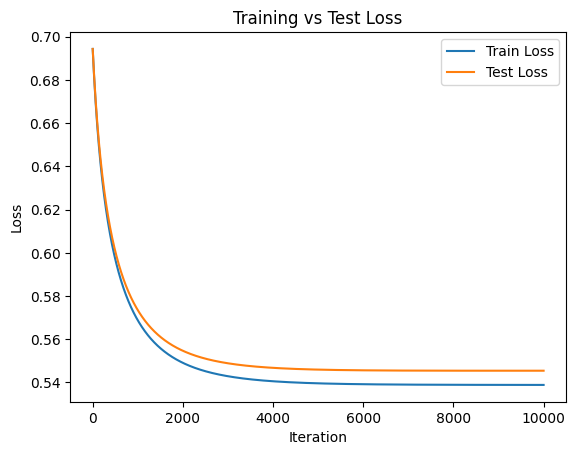

In [7]:
# Plot training loss over iterations
plt.plot(A[2], A[1], label="Train Loss")  # A[2] = iterations, A[1] = training loss list

# Plot test (validation) loss over iterations
plt.plot(A[2], A[3], label="Test Loss")   # A[3] = test/validation loss list

plt.xlabel("Iteration")         

plt.ylabel("Loss")              

plt.title("Training vs Test Loss")  

plt.legend()                    

plt.show()                      


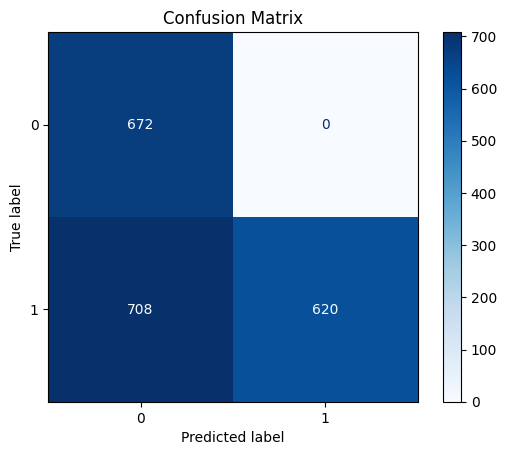

In [12]:
#  Get predicted probabilities using the sigmoid function
# A[0] contains the final trained weights from the GD function
y_prob = sigmoid(X_test @ A[0])  # Raw predictions converted to probabilities

#  Convert probabilities to binary class predictions (0 or 1)
# A threshold of 0.5 is used for binary classification
y_pred = (y_prob >= 0.5).astype(int)

#  Import metrics and compute confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute the confusion matrix comparing true vs. predicted labels
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix as a heatmap
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")  
plt.title("Confusion Matrix")  
plt.show()  
